# Initial Study Area Exploration
The main task of this notebook is to define a study area for the project, and make some initial assumptions and choices about the geospatial components of this project. We are primarily interested in the Chicagoland Metropolitan Area, and there are three candidate study areas in increasing size:
1. Chicago, IL - The smallest study area alternative with good access to spatial data (253 sq mi).
2. Cook County, IL - Intermediate size and will provide better variance in spatial properties from urban to suburban (945 sq mi).
3. [Chicago Metroplitan Agency for Planniing (CMAP) Regional Area](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwj5496h_N-BAxXyvokEHd1sAQgQFnoECBAQAQ&url=https%3A%2F%2Fwww.cmap.illinois.gov%2F&usg=AOvVaw3e_jZTkoQcf-eWSfgcrllx&opi=89978449) - Comprised of Cook, DuPage, Kane, Kendall, Lake, Will, and McHenry Counties, this alternative will provide the largest anaylsis, but will be complex in terms of data acquisition, spatial analysis, and machine learning modeling. The makeup of urban/rural areas will also provide a challenge when applying global approaches to modeling (4,105 sq mi).

## Alternative 1: Chicago Illinois
SHP file data for Chicago provided by [Chciago Data Portal](https://data.cityofchicago.org). City Boundary was last updated in June 2017.

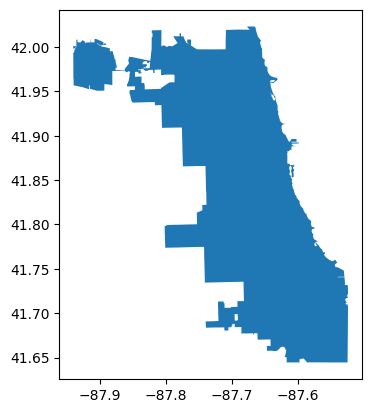

In [5]:
# geopandas imports
import geopandas as gpd
import matplotlib.pyplot as plt

# directory
import os
current_dir = os.path.dirname("")
data_path = os.path.join(current_dir, "../data")

# original data from https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-City/ewy2-6yfk
file = "external/shp/Boundaries - City/geo_export_f3d57916-cb89-4faf-b26b-d00cef8241f9.shp"

#plot boundary
chicago_gdf = gpd.read_file(os.path.join(data_path, file))
chicago_gdf.plot()
plt.show()

## Alternative 2: Cook County, Illinois
SHP file for Cook County Boundary provided by Cook [County Open Data](https://datacatalog.cookcountyil.gov). This data was last updated on March 31, 2023.

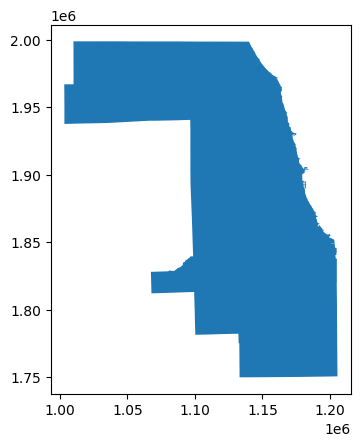

In [6]:
# original data from https://hub-cookcountyil.opendata.arcgis.com/search?categories=boundaries%2Cgeometric%2Ctax%20district%2Ccounty%2Cstate%2Cfederal%2Cmunicipal%2Cunincorporated%20cook
file = "external/shp/Cook_County_Border/Cook_County_Border.shp"

# plot boundary
cook_gdf = gpd.read_file(os.path.join(data_path, file))
cook_gdf.plot()
plt.show()

## Alternative 3: CMAP Regional Area
The final alternative consists of CMAP Counties. There does not appear to be such a SHP file available so we shall construct an `interim` SHP file for analysis.

The original data is from the [Illinois Geospatial Data Clearinghouse](https://clearinghouse.isgs.illinois.edu/frontpage) (2003).

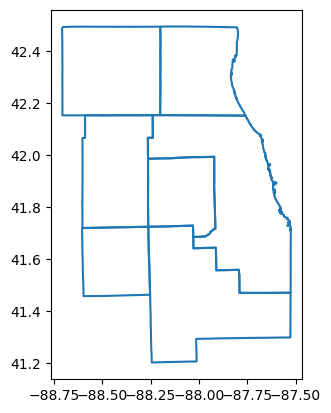

In [7]:
# original data from https://clearinghouse.isgs.illinois.edu/data/reference/illinois-county-boundaries-polygons-and-lines
file = "external/shp/IL_BNDY_County/IL_BNDY_County_Py.shp"
il_counties_gdf = gpd.read_file(os.path.join(data_path, file))

# list of counties in CMAP region:
CMAP_counties = ["COOK", "DUPAGE", "KANE", "KENDALL", "LAKE", "MCHENRY", "WILL"]

# create gdf with CMAP counties
CMAP_gdf = il_counties_gdf[il_counties_gdf["COUNTY_NAM"].isin(CMAP_counties)]

# plot
CMAP_gdf.boundary.plot()
plt.show()

## Inspect Coordinate Reference System
All shp files have [coordinate reference systems (CRS)](https://en.wikipedia.org/wiki/Spatial_reference_system) implemented into them. Let us confirm the CRS of each alternative.

In [8]:
for i, area in enumerate([chicago_gdf, cook_gdf, CMAP_gdf]):
    print(f"Alternative {i+1}\tcrs: {area.crs}")

Alternative 1	crs: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]
Alternative 2	crs: EPSG:3435
Alternative 3	crs: EPSG:4269


We will use [EPSG: 3435](https://epsg.io/3435) for this task. The file `spatial/crs_geoprocessing` was used to convert the above three alternatives to the corrext CRS.

# Project Area Overview
Let us see an overview of the project area alternatives.

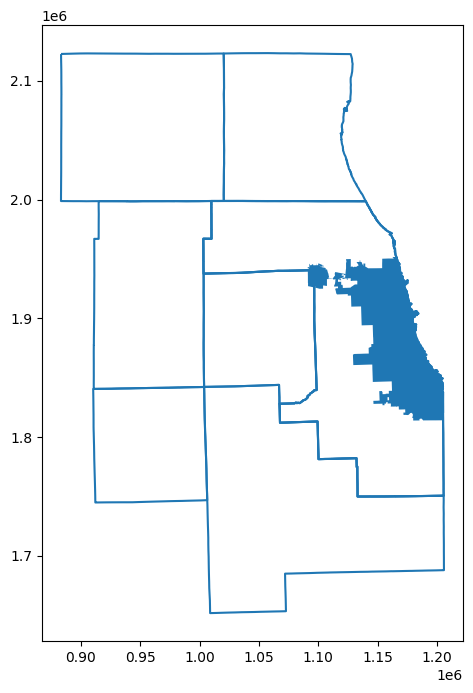

In [19]:
chicago = gpd.read_file(
    os.path.join(
        data_path, "interim/shp/chicago/chicago_epsg3435.shp"
        )
    )

cook = gpd.read_file(
    os.path.join(
        data_path, "interim/shp/cook/cook_epsg3435.shp"
    )
)

CMAP = gpd.read_file(
    os.path.join(
        data_path, "interim/shp/cmap/cmap_epsg3435.shp"
    )
)

fig, ax = plt.subplots(figsize = (8,8))

chicago.plot(ax = ax)
cook.boundary.plot(ax=ax)
CMAP.boundary.plot(ax=ax)

plt.show()